### 1) Модифицировать реализацию KNN из методички так, чтобы больший вес в предсказания вносили наиболее близко расположенные объекты.
### 2*) Для четырех кластеров найти их иерархическую структуру(иерархическая кластеризация) на основе межкластерного расстояния 'average'(https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

In [105]:
import numpy as np
from scipy.stats import rankdata
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [106]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [107]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

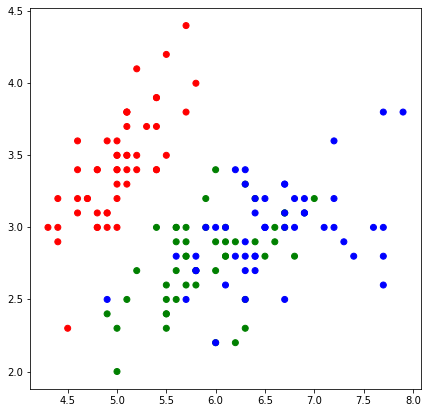

In [108]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [109]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i]-x2[i])
    return np.sqrt(distance)

def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [116]:
def knn(x_train, y_train, x_test, k, weighted: str = "ordered"):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        sorted_distance = sorted(test_distances)[0:k]
        
        if weighted == "ordered":
            sorted_distance = rankdata(sorted_distance)
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in range(k):
            dist, class_label = sorted_distance[d]
            lasses[class_label] += 1 / (dist + 0.001)
        
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers